In [1]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
import pickle

rcParams['figure.figsize'] = (10, 6)

def load_results(file_name):
    complete_path = f"C:\\dev\\pymoskito\\pymoskito\\examples\\ballbeam\\results\\simulation\\{file_name}.pmr"
    with open(complete_path, "rb") as f:
        return pickle.load(f)['results']

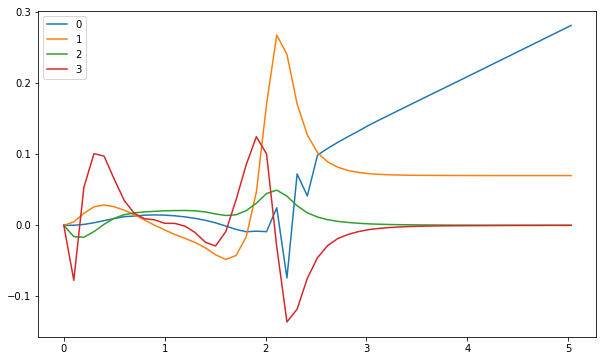

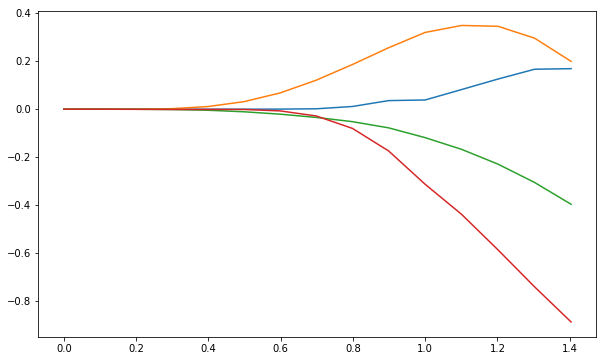

In [33]:
time = load_results('nelder-mead_with_chi0')['time']
slsqp = load_results('slsqp_unconstrained_with_chi0')['Observer']
nelder_mead = load_results('nelder-mead_with_chi0')['Observer']

selected_data = slsqp
figure(1)
plot(time, selected_data[:, :4] - selected_data[:, 4:8])
legend(['0', '1', '2', '3'])

figure(2)
plot(time[:15], nelder_mead[:15, 4:8] - slsqp[:15, 4:8])

show()

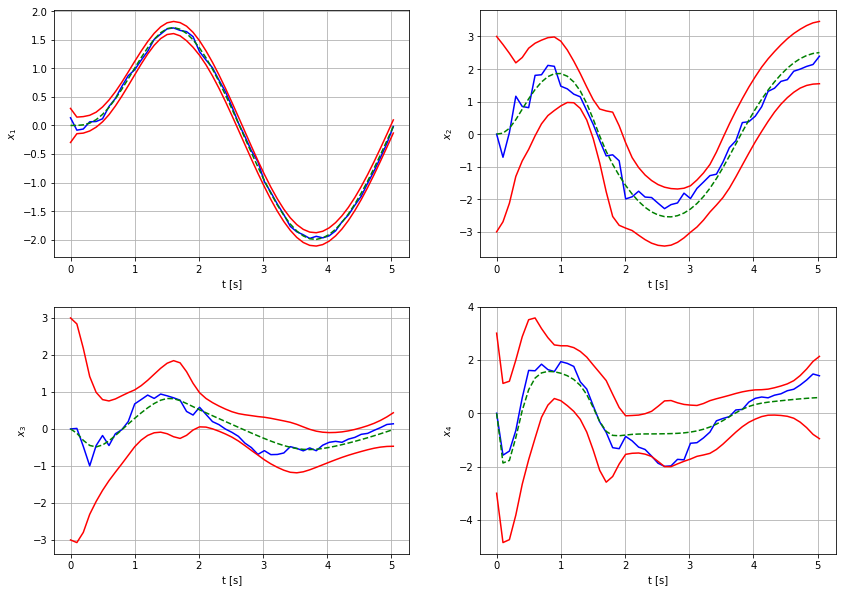

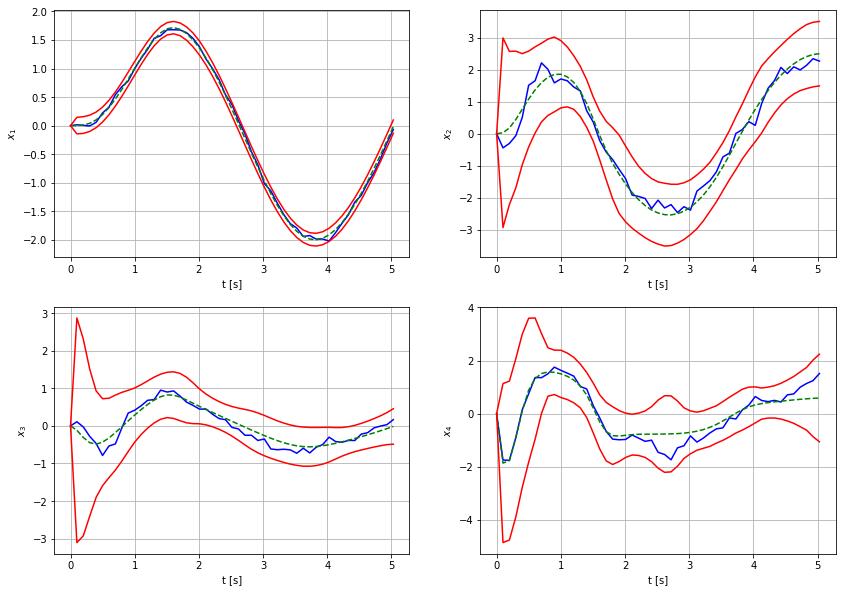

In [17]:
def plot_with_sd(t, measurement, real, sd, sigma_size=3):
    lower_limit = real - sigma_size*sd
    upper_limit = real + sigma_size*sd
    
    plot(t, measurement, color='blue')
    plot(t, real, '--', color='green')
    plot(t, lower_limit, color='red')
    plot(t, upper_limit, color='red')


time = load_results('ekf_with_noise')['time']
ekf = load_results('ekf_with_noise')['Observer']
ekf_real = load_results('ekf_with_noise')['Solver']
ekf_meas = load_results('ekf_with_noise')['Model']
slsqp = load_results('mhe_with_noise')['Observer']
slsqp_real = load_results('mhe_with_noise')['Solver']
slsqp_meas = load_results('mhe_with_noise')['Model']

sd_ekf = np.sqrt(ekf[:, 4:])

sd_slsqp = np.sqrt(slsqp[:, 4:])

figure(1, figsize=(14, 10))
for i in range(4):
    subplot(221 + i)
    plot_with_sd(time, ekf[:,i], ekf_real[:,i], sd_ekf[:,i])
    xlabel('t [s]')
    ylabel(f"$x_{i+1}$")
    grid()
    
figure(2, figsize=(14, 10))
for i in range(4):
    subplot(221 + i)
    plot_with_sd(time, slsqp[:,i], slsqp_real[:,i], sd_slsqp[:,i])
    xlabel('t [s]')
    ylabel(f"$x_{i+1}$")
    grid()

show()